In [2]:
import os
import pandas as pd

def explorar_dataset(ruta_base):
    print(f"--- Explorando: {ruta_base} ---")
    
    extensiones = {}
    carpetas_sujetos = []

    for root, dirs, files in os.walk(ruta_base):
        # Filtrar carpetas de sujetos (ej. s1_r_1)
        if "data" in root and len(dirs) == 0: 
            carpetas_sujetos.append(root)
            
        for file in files:
            ext = os.path.splitext(file)[1]
            extensiones[ext] = extensiones.get(ext, 0) + 1

    print(f"\nTipos de archivos encontrados: {extensiones}")
    print(f"Total de sesiones/carpetas de grabación: {len(carpetas_sujetos)}")
    
    # Mostrar ejemplo de un archivo de datos
    if carpetas_sujetos:
        ejemplo_carpeta = carpetas_sujetos[0]
        archivos_ejemplo = os.listdir(ejemplo_carpeta)
        print(f"\nArchivos en una carpeta de sesión ({ejemplo_carpeta}):")
        for f in archivos_ejemplo:
            print(f" - {f}")

# Ejecutar (asegúrate de haber clonado el repo y estar en la ruta correcta)
explorar_dataset('./myo-dataset/dataset')

--- Explorando: ./myo-dataset/dataset ---

Tipos de archivos encontrados: {'.csv': 4495, '.yaml': 1890}
Total de sesiones/carpetas de grabación: 63

Archivos en una carpeta de sesión (./myo-dataset/dataset\s10_r_1):
 - s10_r_1-paper-0-emg.csv
 - s10_r_1-paper-0-meta.yaml
 - s10_r_1-paper-0-orientation.csv
 - s10_r_1-paper-0-pose.csv
 - s10_r_1-paper-1-emg.csv
 - s10_r_1-paper-1-meta.yaml
 - s10_r_1-paper-1-orientation.csv
 - s10_r_1-paper-1-pose.csv
 - s10_r_1-paper-2-emg.csv
 - s10_r_1-paper-2-meta.yaml
 - s10_r_1-paper-2-orientation.csv
 - s10_r_1-paper-2-pose.csv
 - s10_r_1-paper-3-emg.csv
 - s10_r_1-paper-3-meta.yaml
 - s10_r_1-paper-3-orientation.csv
 - s10_r_1-paper-3-pose.csv
 - s10_r_1-paper-4-emg.csv
 - s10_r_1-paper-4-meta.yaml
 - s10_r_1-paper-4-orientation.csv
 - s10_r_1-paper-4-pose.csv
 - s10_r_1-paper-5-emg.csv
 - s10_r_1-paper-5-meta.yaml
 - s10_r_1-paper-5-orientation.csv
 - s10_r_1-paper-5-pose.csv
 - s10_r_1-paper-6-emg.csv
 - s10_r_1-paper-6-meta.yaml
 - s10_r_1-pap

## Tipo de Archivo,Sufijo del nombre,Contenido

EMG,-emg.csv,Datos crudos de los 8 sensores del brazalete (valores entre -128 y 127).

Pose,-pose.csv,El gesto detectado por el algoritmo interno de Myo.

Orientación,-orientation.csv,"Datos del IMU (acelerómetro, giroscopio, cuaterniones)."

Metadatos,-meta.csv,"Información sobre el sujeto, el brazo (0=derecho, 1=izquierdo) y la hora."

In [5]:
# DATOS EMG
def leer_ejemplo_emg(ruta_archivo_emg):
    # Los archivos no tienen cabecera, definimos los nombres de los sensores
    columnas = [f'Sensor_{i}' for i in range(1, 9)]
    
    df = pd.read_csv(ruta_archivo_emg, names=columnas)
    
    print("\nEstructura interna del archivo EMG (Primeras 5 filas):")
    print(df.head())
    print(f"\nForma del dataset (filas, columnas): {df.shape}")

# Reemplaza con una ruta real tras clonar el repo
leer_ejemplo_emg('myo-dataset/dataset/s1_r_1/s1_r_1-rock-0-emg.csv')


Estructura interna del archivo EMG (Primeras 5 filas):
                        Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5  \
index timestamp                0         1         2         3         4   
0     1596963857685707         5        23        -8        -1        -1   
1     1596963857685707        -6       -14        -4        -1        -2   
2     1596963857686698         1         7         1         2         2   
3     1596963857686698        -3         3         1        -4        -3   

                        Sensor_6  Sensor_7  Sensor_8  
index timestamp                5         6         7  
0     1596963857685707         0       -11        -4  
1     1596963857685707        -2         3        -1  
2     1596963857686698         1        -1        -6  
3     1596963857686698       -13       -51       -10  

Forma del dataset (filas, columnas): (405, 8)


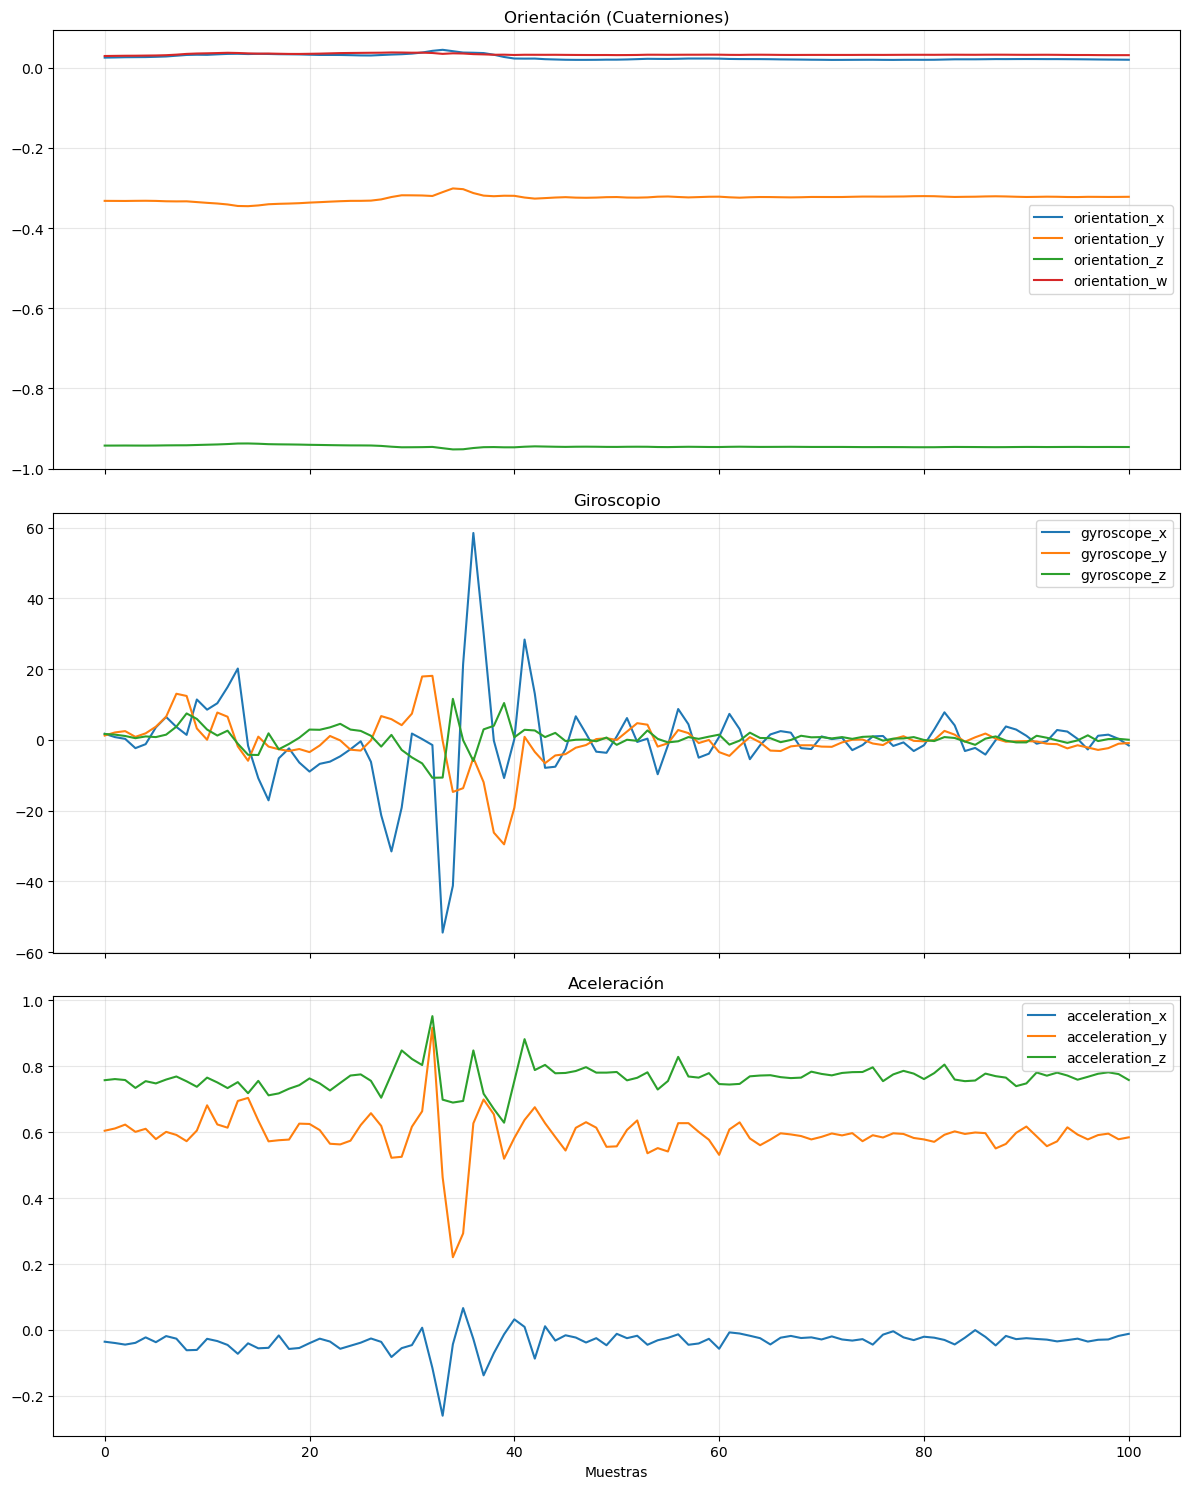

In [7]:
# DATOS IMU
import pandas as pd
import matplotlib.pyplot as plt

def visualizar_datos_completos(ruta_archivo):
    # 1. Leer el archivo normalmente (Pandas usará la primera fila como cabecera)
    df = pd.read_csv(ruta_archivo)
    
    # 2. Definir los grupos de columnas según tu imagen
    col_orientacion = ['orientation_x', 'orientation_y', 'orientation_z', 'orientation_w']
    col_giroscopio = ['gyroscope_x', 'gyroscope_y', 'gyroscope_z']
    col_aceleracion = ['acceleration_x', 'acceleration_y', 'acceleration_z']

    # 3. Crear subplots para ver todo sin que se amontone
    fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)
    
    # Graficar Orientación
    df[col_orientacion].plot(ax=axes[0])
    axes[0].set_title('Orientación (Cuaterniones)')
    axes[0].grid(True, alpha=0.3)
    
    # Graficar Giroscopio
    df[col_giroscopio].plot(ax=axes[1])
    axes[1].set_title('Giroscopio')
    axes[1].grid(True, alpha=0.3)
    
    # Graficar Aceleración
    df[col_aceleracion].plot(ax=axes[2])
    axes[2].set_title('Aceleración')
    axes[2].set_xlabel('Muestras')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Ejecución
ruta = 'myo-dataset/dataset/s1_r_1/s1_r_1-paper-0-orientation.csv'
visualizar_datos_completos(ruta)

In [8]:
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import matplotlib.pyplot as plt
import os

def generar_reporte_completo(nombre_pdf, ruta_emg, ruta_ori):
    with PdfPages(nombre_pdf) as pdf:
        
        # --- PÁGINA 1: DATOS DE ORIENTACIÓN, GIROSCOPIO Y ACELERACIÓN ---
        df_ori = pd.read_csv(ruta_ori)
        fig_ori, axes = plt.subplots(3, 1, figsize=(10, 14))
        
        # Graficar cada grupo
        df_ori[['orientation_x', 'orientation_y', 'orientation_z', 'orientation_w']].plot(ax=axes[0], title='Orientación (Cuaterniones)')
        df_ori[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']].plot(ax=axes[1], title='Giroscopio')
        df_ori[['acceleration_x', 'acceleration_y', 'acceleration_z']].plot(ax=axes[2], title='Aceleración')
        
        for ax in axes: ax.grid(True, alpha=0.3)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        fig_ori.suptitle(f"Análisis de Movimiento: {os.path.basename(ruta_ori)}", fontsize=16)
        
        pdf.savefig(fig_ori)
        plt.close(fig_ori)

        # --- PÁGINA 2: DATOS DE EMG (8 CANALES) ---
        # Definimos nombres de columnas ya que los EMG no suelen traer cabecera
        cols_emg = [f'Sensor_{i}' for i in range(1, 9)]
        df_emg = pd.read_csv(ruta_emg, names=cols_emg)
        
        fig_emg, ax_emg = plt.subplots(figsize=(10, 7))
        df_emg.plot(ax=ax_emg, alpha=0.8)
        ax_emg.set_title(f"Señales EMG: {os.path.basename(ruta_emg)}", fontsize=14)
        ax_emg.set_xlabel("Muestras")
        ax_emg.set_ylabel("Amplitud (-128 a 127)")
        ax_emg.grid(True, alpha=0.3)
        
        plt.tight_layout()
        pdf.savefig(fig_emg)
        plt.close(fig_emg)

        # --- PÁGINA 3: RESUMEN DEL DATASET (TEXTO) ---
        # Creamos una figura vacía para escribir el resumen estadístico
        fig_text = plt.figure(figsize=(10, 8))
        resumen = f"REPORTE DE DATASET\n{'='*20}\n\n"
        resumen += f"Archivo EMG: {os.path.basename(ruta_emg)}\n"
        resumen += f"Filas detectadas: {len(df_emg)}\n\n"
        resumen += f"Estadísticas EMG:\n{df_emg.describe().to_string()}\n\n"
        resumen += f"Estadísticas Orientación:\n{df_ori.describe().iloc[:, :4].to_string()}" # Solo primeros 4 cols para que quepa
        
        plt.text(0.05, 0.95, resumen, transform=fig_text.transFigure, size=10, family='monospace', verticalalignment='top')
        plt.axis('off')
        
        pdf.savefig(fig_text)
        plt.close(fig_text)

    print(f"✅ Reporte guardado exitosamente como: {nombre_pdf}")

# --- EJECUCIÓN ---
# Define aquí tus rutas reales
archivo_emg = 'myo-dataset/dataset/s1_r_1/s1_r_1-paper-0-emg.csv'
archivo_ori = 'myo-dataset/dataset/s1_r_1/s1_r_1-paper-0-orientation.csv'

generar_reporte_completo('Resultado_Analisis_Myo.pdf', archivo_emg, archivo_ori)

✅ Reporte guardado exitosamente como: Resultado_Analisis_Myo.pdf
